# **Importing Libraries**

In [ ]:
import os
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report



# **EXPLORATORY DATA ANALYSIS**

In [ ]:
# IMPORTING DATASET
df=pd.read_csv('data.csv')
print(df)
print('============ Total number of columns====================')
print(df.columns)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
print('============ Total number of columns====================')
print(df.columns)

============ Total number of columns====================
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


**DESCRIPTIVE STATISTICS**

In [ ]:

print('================================== DATA STATISTICS ==========================')
print(df.describe())



================================== DATA STATISTICS ==========================
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min         

B    357
M    212
Name: diagnosis, dtype: int64


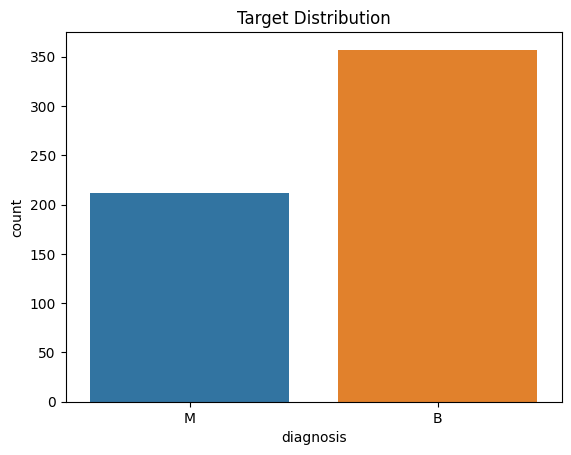

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# target variable distribution
print(df.diagnosis.value_counts())
sns.countplot(x = df['diagnosis']);
plt.title("Target Distribution")
plt.show()

#**Checking Null Values**

In [ ]:
# checking for null values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#**Checking Categorical Features**

In [ ]:
df.select_dtypes(include=['object']).dtypes

diagnosis    object
dtype: object

#**Converting Categorical Feature Diagnosis**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode labels in column 'species'.
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])


In [ ]:
bg= df[df['diagnosis']==1]

mg = df[df['diagnosis']==0]
print(bg.shape,mg.shape)

(212, 31) (357, 31)


#**Visualization of Features Distribution**

<ipython-input-47-2d5a492499ea>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-47-2d5a492499ea>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-47-2d5a492499ea>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in s

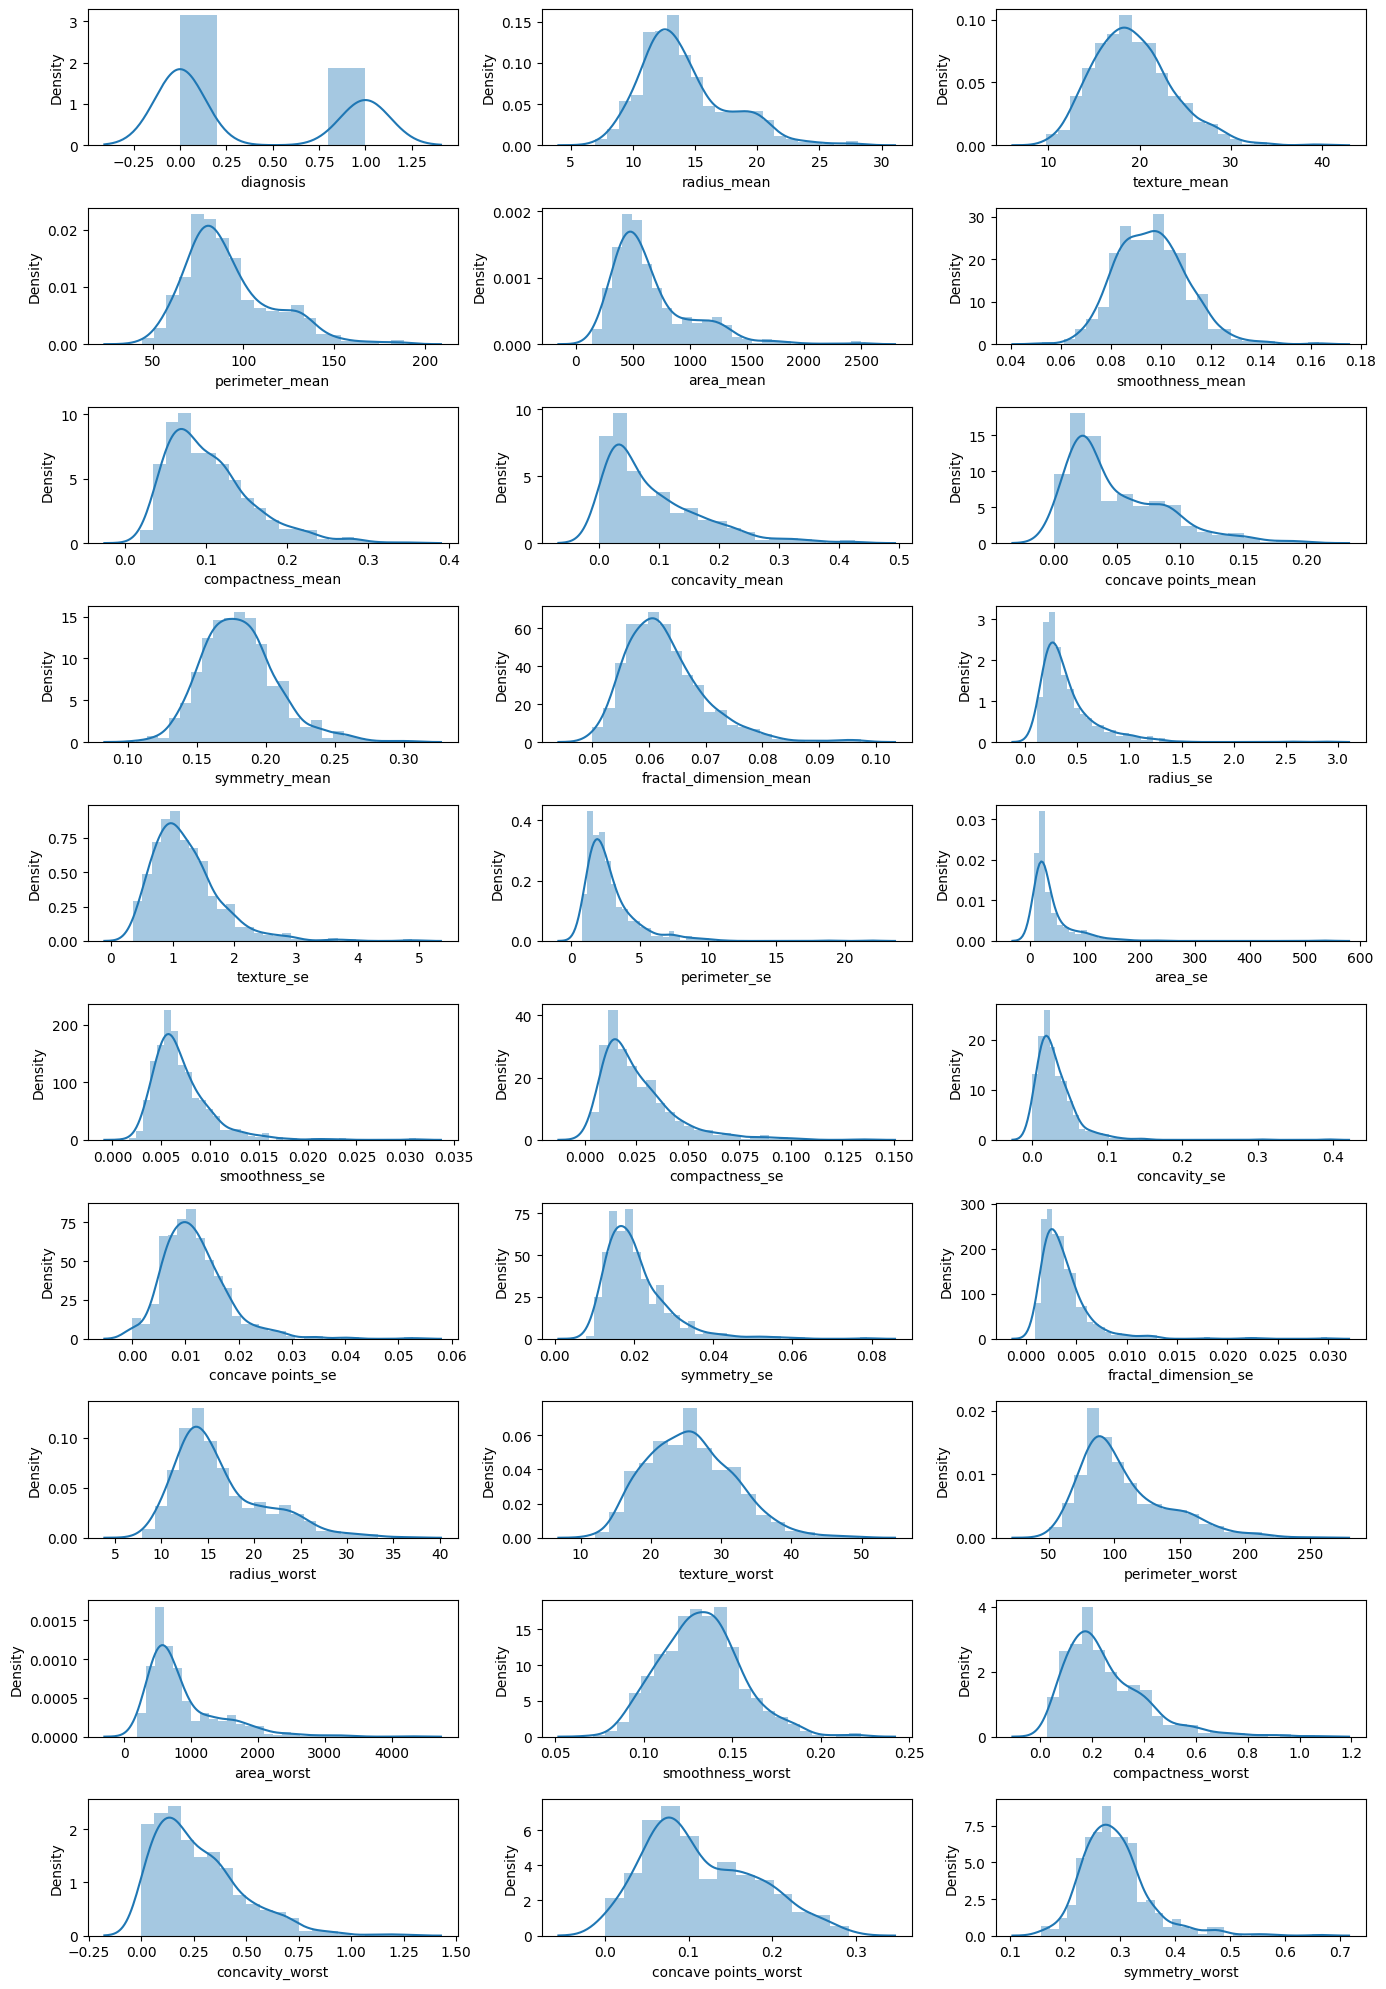

In [ ]:
plt.figure(figsize = (14, 20))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(10, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

#**Checking Features Correlation**

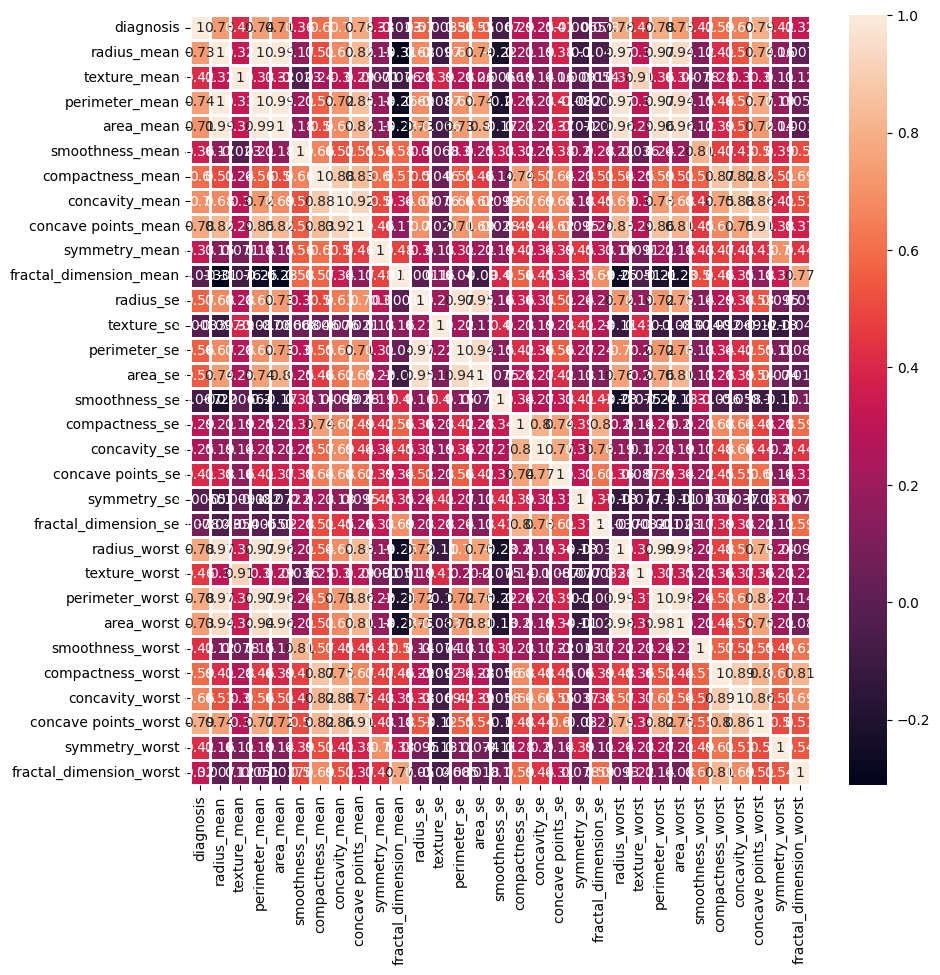

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True , linewidths=1);

#**Feature Selection using Pearson Correlation**

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.96)
len(set(corr_features))

6

In [ ]:
corr_features


{'area_mean',
 'area_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst'}

In [ ]:
df.drop(corr_features,axis=1)
df.drop(corr_features,axis=1)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y=df.pop('diagnosis')

# **HANDLING IMBALANCE DATASET**

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Oversampling for Handling Imbalanced
smk = SMOTETomek(random_state=42)
xdata,ydata=smk.fit_resample(df,y)

In [ ]:
xdata.shape,ydata.shape

((696, 30), (696,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(xdata)))
print('Resampled dataset shape {}'.format(Counter(ydata)))

Original dataset shape Counter({'radius_mean': 1, 'texture_mean': 1, 'perimeter_mean': 1, 'area_mean': 1, 'smoothness_mean': 1, 'compactness_mean': 1, 'concavity_mean': 1, 'concave points_mean': 1, 'symmetry_mean': 1, 'fractal_dimension_mean': 1, 'radius_se': 1, 'texture_se': 1, 'perimeter_se': 1, 'area_se': 1, 'smoothness_se': 1, 'compactness_se': 1, 'concavity_se': 1, 'concave points_se': 1, 'symmetry_se': 1, 'fractal_dimension_se': 1, 'radius_worst': 1, 'texture_worst': 1, 'perimeter_worst': 1, 'area_worst': 1, 'smoothness_worst': 1, 'compactness_worst': 1, 'concavity_worst': 1, 'concave points_worst': 1, 'symmetry_worst': 1, 'fractal_dimension_worst': 1})
Resampled dataset shape Counter({1: 348, 0: 348})


#**Train Test Split**

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(df,y, test_size=0.3)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(398, 30)
(171, 30)
(398,)
(171,)


#**Model Training**

In [ ]:
# implementing algorthm DT
from sklearn.svm import SVC
SVM = SVC()
ModelSVM = SVM.fit(train_X,train_y)

#**Model Testing**

In [ ]:
PredictionSVM = SVM.predict(test_X)

#**Training Accuracy**

In [ ]:
# =====================ACCUARACY===========================
print("=====================SVM Training Accuarcy=============")
tracSVM=SVM.score(train_X,train_y)
trainingAccSVM=tracSVM*100
print(trainingAccSVM)


=====================SVM Training Accuarcy=============
92.46231155778895


#**Testing Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print("====================SVM Testing Accuracy============")
teacSVM=accuracy_score(test_y,PredictionSVM)
testingAccSVM=teacSVM*100
print(testingAccSVM)
from sklearn.metrics import confusion_matrix
print(classification_report(test_y, PredictionSVM))
confusion_matrix(test_y, PredictionSVM)

====================SVM Testing Accuracy============
88.88888888888889
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       110
           1       0.89      0.79      0.83        61

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171



array([[104,   6],
       [ 13,  48]])

In [ ]:
#Graphical Representation
import seaborn as sns
import matplotlib.pyplot as plt
# sns.pairplot(df)
# plt.show()